In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'train'
valid_path = 'test'

In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg.layers:
    layer.trainable = False

In [5]:
folders = glob('train/*')

In [6]:
len(folders)

2

In [7]:
x = Flatten()(vgg.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:


# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)



In [12]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [46]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
163/163 [==============================] - 1276s 8s/step - loss: 0.2145 - accuracy: 0.9201 - val_loss: 0.2602 - val_accuracy: 0.9183
Epoch 2/5
163/163 [==============================] - 1304s 8s/step - loss: 0.1220 - accuracy: 0.9530 - val_loss: 0.5752 - val_accuracy: 0.8462
Epoch 3/5
163/163 [==============================] - 1250s 8s/step - loss: 0.1008 - accuracy: 0.9617 - val_loss: 0.5733 - val_accuracy: 0.8526
Epoch 4/5
163/163 [==============================] - 1201s 7s/step - loss: 0.0915 - accuracy: 0.9672 - val_loss: 0.2511 - val_accuracy: 0.9215
Epoch 5/5
163/163 [==============================] - 1183s 7s/step - loss: 0.0669 - accuracy: 0.9734 - val_loss: 0.4199 - val_accuracy: 0.8798


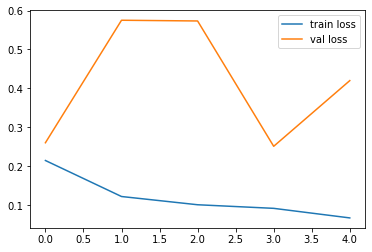

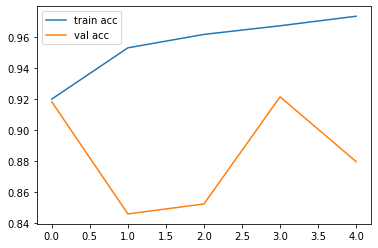

<Figure size 432x288 with 0 Axes>

In [50]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [2]:
import tensorflow as tf

from keras.models import load_model

# model.save('model_vgg16.h5')

In [3]:
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3

In [4]:
model = load_model('model_vgg16.h5')

In [5]:
# img = image.load_img('val\PNEUMONIA\person1946_bacteria_4874.jpeg' , target_size= (224,224))
img = image.load_img(r'val\NORMAL\IM-0001-0001.jpeg' , target_size= (224,224))

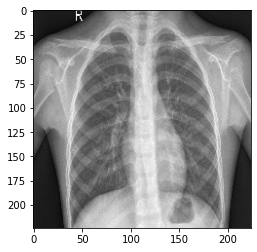

In [6]:
plt.imshow(img)

In [7]:
x = image.img_to_array(img)

In [8]:
x =np.expand_dims(x, axis=0)

In [9]:
img_data = preprocess_input(x)

In [12]:
res= model.predict(img_data)


In [13]:
res.shape

(1, 2)

In [14]:
res[0][1]

1.0

In [15]:
res[0][0]

4.2560395e-12

In [16]:
if res[0][1]>=0.8:
    print('You have pnuemonia')
else :
    print('Your scan seem to be normal')

You have pnuemonia
